# Conventional pole-based APWP

In [19]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
from pmagpy import ipmag, pmag
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

from vgptools.auxiliar import (get_files_in_directory, spherical2cartesian, 
                               cartesian2spherical, GCD_cartesian)                              
from vgptools.utils_compilation import dfs_vgps_recomputed_poles
from vgptools.utils_APWPs import running_mean_APWP
from vgptools.utils_visualization import  RM_stats, plot_poles_and_APWP, RM_APWP_lat_lon_A95

Path to the VGP directory.

In [20]:
current_path = os.getcwd()
data_path_VGP = current_path + '/data/vgp_database'

## Generate a DataFrame for both, the VGPs and the recomputed poles by study

In doing so, we calculate a pole for each study taking into account all the vgps within the same area/study

In [21]:
df_filtered_vgps, df_pole_compilation_by_study = dfs_vgps_recomputed_poles(data_path_VGP, by_study = True)

In [25]:
df_pole_compilation_by_study.to_csv(current_path +'/data/df_pole_compilation_by_study.csv', index = False)
df_pole_compilation_by_study.head(3) #

,Study,pole,N,K,A95,slat,slon,Plat,Plon,min_age,max_age,mean_age
0,Absaroka_volcanics,NaN,44,11.076771,6.774448,44.613899,250.051065,-81.917678,328.575930,45.00,54.000,49.5000
1,Beaver_River_intrusions,NaN,21,44.972756,4.792312,60.238151,234.652209,-79.313242,327.669841,40.50,43.500,42.0000
2,Bighorn_Basin_sediments,NaN,59,10.640570,5.954672,44.459816,251.809627,-81.549042,2.761738,52.54,59.237,55.8885


# Agragated poles by Study
We first apply the running mean method with the same parameter as in Torsvik et al. 2012 - a window lenght of 20 Ma and a time-step of 10 Ma.

In [5]:
min_age = 5
max_age = 65
window_length = 20
time_step = 10

In [6]:
RM_classic_by_study = running_mean_APWP (df_pole_compilation_by_study, "Plon", "Plat", "mean_age", window_length, time_step, max_age, min_age)
RM_classic_by_study.head(15)

,age,N,n_studies,k,A95,csd,plon,plat
0,5.0,15.0,15.0,157.806367,3.053286,6.447966,-67.163587,-87.015353
1,15.0,8.0,8.0,210.014597,3.831130,5.589337,-32.919354,-86.068555
2,25.0,5.0,5.0,895.850781,2.557892,2.706245,-17.523472,-81.827340
3,35.0,7.0,7.0,360.030070,3.185699,4.268897,-28.223624,-81.832353
4,45.0,10.0,10.0,181.627221,3.594097,6.010278,-24.352354,-81.719603
5,55.0,6.0,6.0,149.367567,5.499925,6.627609,-13.024997,-81.238399


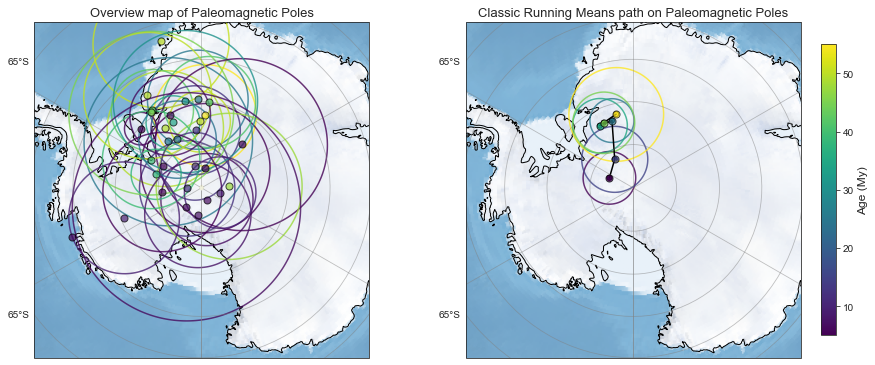

In [8]:
extent = [-180,180,-70,-70]
plot_poles_and_APWP(extent, df_pole_compilation_by_study, RM_classic_by_study)
# plt.savefig(current_path + '/figures/2/2_AB.svg', dpi =600, bbox_inches='tight')

### Age distribution of paleomagnetic poles

<AxesSubplot:title={'center':'Mean age distribution of Paleomagnetic Poles'}, xlabel='Mean Age (Ma)', ylabel='# of Paleomagentic Poles'>

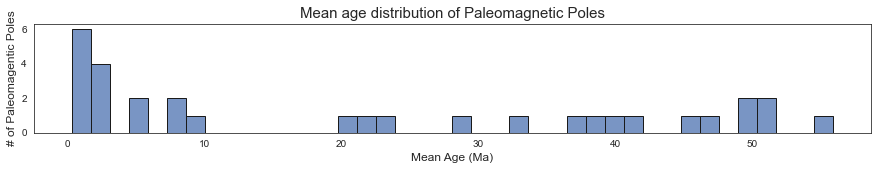

In [9]:
sns.set_style(style=None, rc=None)
sns.set_palette("deep")
fig = plt.figure(figsize=(15,2))
plt.title('Mean age distribution of Paleomagnetic Poles', fontsize =15)
plt.ylabel('# of Paleomagentic Poles', fontsize = 12)
plt.xlabel('Mean Age (Ma)', fontsize = 12)
sns.histplot(data = df_pole_compilation_by_study, x = 'mean_age', bins = 40, legend = False, edgecolor=".1") 
# plt.savefig(current_path + '/figures/2/2_C.svg', dpi =600, bbox_inches='tight')

### Running Mean Statistics

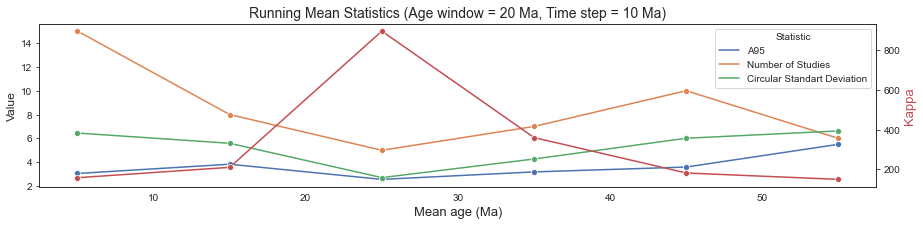

In [10]:
sns.set_palette("deep")
RM_stats(RM_classic_by_study, f"Running Mean Statistics (Age window = {window_length} Ma, Time step = {time_step} Ma)","Age (Ma)","kappa")
# plt.savefig(current_path + '/figures/2/2_D.svg', dpi =600, bbox_inches='tight')